# Spectral filtering (spectral round-trip at a lower truncation)

and vizualisation of differences as (DCT) variance spectrum plot

In [1]:
%matplotlib inline
# for figures in notebook

# import & initialize epygram
import epygram
epygram.init_env()

import os
INPUTS_DIR = os.path.join(epygram.config.installdir, 'doc_sphinx', 'source', 'gallery', 'inputs')

In [2]:
r = epygram.formats.resource(os.path.join(INPUTS_DIR, 'ICMSHAROM+0022'), 'r')
t59 = r.readfield('S059TEMPERATURE')
spgeom = r.spectral_geometry
t59.sp2gp()

In [3]:
# initial field spectrum
sp59 = t59.dctspectrum()
sp59.name = t59.fid['FA']

In [4]:
# set new spectral space
print(spgeom.truncation['in_X'], spgeom.truncation['in_Y'])
trunc_spgeom = spgeom.deepcopy()
trunc_spgeom.truncation['in_X'] = 100
trunc_spgeom.truncation['in_Y'] = 100
# spectral roundtrip
t59.gp2sp(trunc_spgeom)
t59.sp2gp()
# and compute DCT spectrum
sp59f = t59.dctspectrum()
sp59f.name = sp59.name + '(filtered)'

124 124


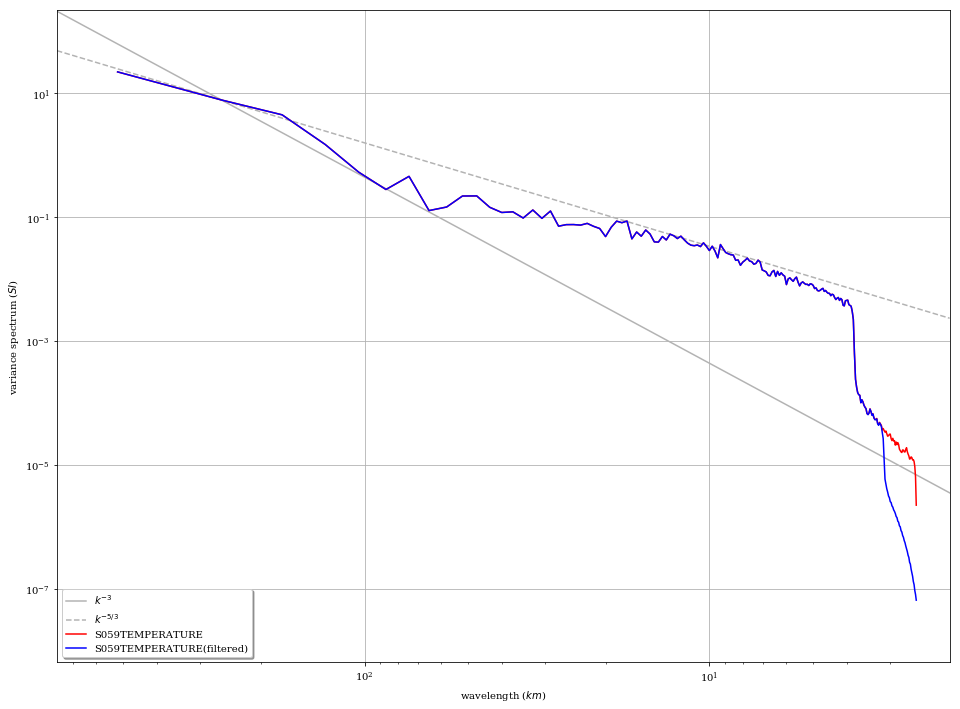

In [6]:
# and plot
fig, ax = epygram.spectra.plotspectra([sp59, sp59f])